In [1]:
from clustersim.core.simulator import Simulator

from clustersim.core.workload import Task, Job, UnifiedRandomWorkload
from clustersim.core.resources import Cpu, GpuSet, Mem, Node
import clustersim.core.scheduler

In [82]:
sim = Simulator()


sim.add_node({'gpus': GpuSet([1, 1, 1, 1])})
dispatcher = sim.add_dispatcher('random')

for _ in range(4):
    dispatcher.add_workload('closed_random',
                            income_range=(0, 0), tasktime_range=(10, 100),
                            resources={'gpus': [0.2, 0.7]})
dispatcher.add_scheduler('basic', sim.nodes, scheme='worst_fit')

sim.run(until=2000)

Start generating work
Start generating work
Start generating work
Start generating work


In [83]:
import pandas as pd
import numpy as np

def moving_avg(series, window):
    if window <= 0:
        return series
    
    if len(series) < window:
        return pd.Series()
    
    new_series = pd.Series(dtype=np.float32)
    for i in range(len(series)-window+1):
        new_series.loc[i] = series.loc[i:i+window-1].mean()

    return new_series

In [84]:
node_stats = sim.nodes[0].records
display(node_stats.loc[:, ('gpu-util', 'task')].head(10))


,gpu-util,task
1.000000,0.225,1.0
3.000000,0.450,2.0
5.000000,0.675,3.0
60.687714,0.450,2.0
62.000000,0.675,3.0
69.641620,0.450,2.0
71.000000,0.675,3.0
102.956648,0.450,2.0
104.000000,0.675,3.0
114.080176,0.450,2.0


,gpu-util,task
0,NaN,NaN
1,0.225,1.0
2,0.225,1.0
3,0.450,2.0
4,0.450,2.0


<AxesSubplot:title={'center':'gpu average util: 0.66'}>

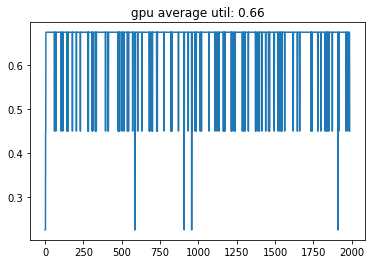

In [85]:
from matplotlib import pyplot as plt

node_ts = node_stats.loc[:,('gpu-util', 'task')] \
    .reindex(range(0, int(node_stats.index[-1])), method='pad')

display(node_ts.head())

mean = node_ts.mean(axis='index')
node_ts['gpu-util'].plot(title='gpu average util: %.2f' % mean['gpu-util'])

<AxesSubplot:title={'center':'gpu moving average'}>

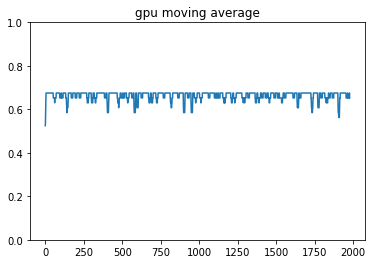

In [87]:
gpu_util_ma = moving_avg(node_ts['gpu-util'], 10)

gpu_util_ma.plot(title='gpu moving average', ylim=[0,1])

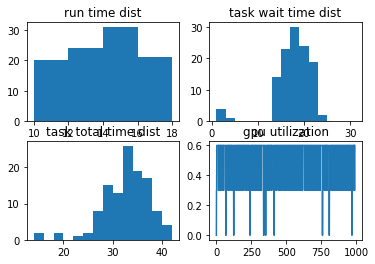

In [4]:
from matplotlib import pyplot as plt

fig, sub = plt.subplots(2, 2)

sub[0][0].hist(task_runtime, bins=range(
    int(min(task_runtime)), int(max(task_runtime)), 2))
sub[0][0].set_title('run time dist')

sub[0][1].hist(task_waittime, range(
    int(min(task_waittime)), int(max(task_waittime)), 2))
sub[0][1].set_title('task wait time dist')

sub[1][0].hist(task_total, range(
    int(min(task_total)), int(max(task_total)), 2))
sub[1][0].set_title('task total time dist')

sub[1][1].plot(index, value)
sub[1][1].set_title('gpu utilization')

plt.show()

In [25]:
sim = Simulator()


sim.add_node({'gpus': GpuSet([1, 1, 1, 1])})
dispatcher = sim.add_dispatcher('random')

for _ in range(4):
    dispatcher.add_workload('closed_random',
                            income_range=(0, 0), tasktime_range=(10, 100),
                            resources={'gpus': [0.2, 0.7]})
dispatcher.add_scheduler('basic', sim.nodes, scheme='random')

sim.run(until=2000)

Start generating work
Start generating work
Start generating work
Start generating work


,gpu-util,task
0,NaN,NaN
1,0.225,1.0
2,0.225,1.0
3,0.450,2.0
4,0.450,2.0


<AxesSubplot:title={'center':'gpu average util: 0.83'}>

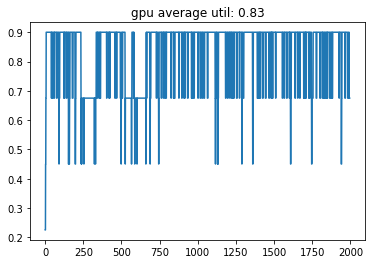

In [26]:
node_stats = sim.nodes[0].records
node_ts = node_stats.loc[:,('gpu-util', 'task')] \
    .reindex(range(0, int(node_stats.index[-1])), method='pad')

display(node_ts.head())

mean = node_ts.mean(axis='index')
node_ts['gpu-util'].plot(title='gpu average util: %.2f' % mean['gpu-util'])

In [73]:
gpu_util_moving_avg = moving_avg(node_ts['gpu-util'], 20)

0       0.757895
1       0.765000
2       0.798750
3       0.832500
4       0.855000
          ...   
1972    0.832500
1973    0.821250
1974    0.810000
1975    0.798750
1976    0.787500
Length: 1977, dtype: float64


<AxesSubplot:title={'center':'moving average'}>

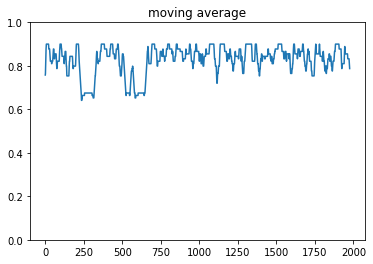

In [76]:
print(gpu_util_moving_avg)
gpu_util_moving_avg.plot(title='moving average', ylim=[0,1])